In [2]:
import folium
import pandas as pd

In [3]:
# define the world map
world_map = folium.Map()

# display world map
world_map

![jupyter](烟台市区域划分.jpg)

In [4]:
# Yantai latitude and longitude values
latitude = 37.411116
longitude = 121.530138

# Create map and display it
Yantai_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Display the map of Yantai
Yantai_map

In [5]:
data = pd.read_csv("D:\\OneDrive\\02_Programs\\2021-Data-competition-Shangdong\\data_emerge_all.csv")
data.head()

,Unnamed: 0,Station_name,district,year_month,power_consum（kWh）,times_charging,Number_charging_piles,latitude,longitude,Unit_per_Cha_time,Unit_per_Cha_pile,month_use_frequency_per_pile
0,0,烟台高新区公交场站,莱山区,202109,147737.44,1857,17,37.411116,121.530138,79.56,8690.44,109
1,1,烟台泓澳新能源充电站,蓬莱市,202109,135702.52,3621,12,37.784622,120.764465,37.48,11308.54,302
2,2,烟台莱山长宁路充电站,莱山区,202109,125802.78,5098,25,37.447031,121.438939,24.68,5032.11,204
3,3,烟台康和新城公交场站,芝罘区,202109,120385.80,1948,9,37.508728,121.323249,61.80,13376.20,216
4,4,山东省烟台市开发区天马相城公交充电站,福山区,202109,117562.77,1236,16,37.580740,121.175610,95.12,7347.67,77


In [6]:
data.dropna(inplace=True)

In [7]:
from folium import plugins
# instantiate a mark cluster object for the incidents in the dataframe
incidents =plugins.MarkerCluster().add_to(Yantai_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(data.latitude, data.longitude, data.Number_charging_piles):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# add incidents to map
Yantai_map.add_child(incidents)


In [8]:
# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# Loop through the 200 crimes and add each to the incidents feature group
for lat, lng, nums in zip(data.latitude, data.longitude, data.Number_charging_piles):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=nums, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4,
            tooltip = nums
        )
    )

# Add incidents to map
Yantai_map_piles_num = folium.Map(location=[latitude, longitude], zoom_start=12)
Yantai_map_piles_num.add_child(incidents)

In [9]:
import json
import requests
def basic_map():
    Yantai_geo = 'city_geojson-master/city_geojson-master/geojsons/Yantai.json'
    basic_map = folium.Map(location = [latitude, longitude], zoom_start = 12)
    folium.GeoJson(
        data = (open(Yantai_geo, "r", encoding="utf-8-sig")).read(),
        style_function=lambda feature: {
            'fillColor': '#ffff00',
            'color': 'black',
            'weight': 2,
            'dashArray': '5, 5'
            }
    ).add_to(basic_map)
    return basic_map
#display map
basic_map()

In [10]:
from folium.plugins import HeatMap

# Convert data format
heatdata = data[['latitude','longitude','Number_charging_piles']].values.tolist()

# add incidents to map
basic_heatMap = basic_map()
HeatMap(heatdata).add_to(basic_heatMap)

basic_heatMap


In [11]:
# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# Loop through the 200 crimes and add each to the incidents feature group
for lat, lng, name in zip(data.latitude, data.longitude, data.Station_name):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4,
            popup=name
            
        )
    )

# Add incidents to map
basic_map().add_child(incidents)

In [12]:
# get the district name
import requests
import json
district_all = pd.Series()
for lat, lgn in zip(data.latitude, data.longitude):
    key = 'GjG3XAdmywz7CyETWqHwIuEC6ZExY6QT'
    r = requests.get(url='http://api.map.baidu.com/geocoder/v2/', params={'location':f'{lat},{lgn}','ak':key,'output':'json'})
    result = r.json()
    # print(result)
    province = result['result']['addressComponent']['province']
    city = result['result']['addressComponent']['city']
    district = result['result']['addressComponent']['district']
    # print(district)

<ipython-input-12-939eb5b84485>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  district_all = pd.Series()


In [13]:
data.head()

,Unnamed: 0,Station_name,district,year_month,power_consum（kWh）,times_charging,Number_charging_piles,latitude,longitude,Unit_per_Cha_time,Unit_per_Cha_pile,month_use_frequency_per_pile
0,0,烟台高新区公交场站,莱山区,202109,147737.44,1857,17,37.411116,121.530138,79.56,8690.44,109
1,1,烟台泓澳新能源充电站,蓬莱市,202109,135702.52,3621,12,37.784622,120.764465,37.48,11308.54,302
2,2,烟台莱山长宁路充电站,莱山区,202109,125802.78,5098,25,37.447031,121.438939,24.68,5032.11,204
3,3,烟台康和新城公交场站,芝罘区,202109,120385.80,1948,9,37.508728,121.323249,61.80,13376.20,216
4,4,山东省烟台市开发区天马相城公交充电站,福山区,202109,117562.77,1236,16,37.580740,121.175610,95.12,7347.67,77


In [14]:
import numpy as np
data_laishan = data[data.district=='莱山区']
data_muping = data[data.district=='牟平区']
data_zhifu = data[data.district=='芝罘区']
data_fushan = data[data.district=='福山区']
data_penglai = data[data.district=='蓬莱市']
data_longkou = data[data.district=='龙口市']
data_zhaoyuan = data[data.district=='招远市']
data_qixia = data[data.district=='栖霞市']
data_haiyang = data[data.district=='海阳市']
data_laiyang = data[data.district=='莱阳市']
data_laizhou = data[data.district=='莱州市']
data_muping.head()

,Unnamed: 0,Station_name,district,year_month,power_consum（kWh）,times_charging,Number_charging_piles,latitude,longitude,Unit_per_Cha_time,Unit_per_Cha_pile,month_use_frequency_per_pile
10,10,山东省烟台市牟平高铁广场公交充电站（内部专用）,牟平区,202109,93159.87,2814,16,37.422700,121.649600,33.11,5822.49,176
22,22,山东省烟台市牟平紫金山庄小区公交充电站（内部专用）,牟平区,202109,43665.99,1289,16,37.430340,121.579270,33.88,2729.12,81
43,43,山东省烟台市牟平区养马岛1号公交充电站,牟平区,202109,16555.35,727,8,37.475060,121.642190,22.77,2069.42,91
44,44,君和新能源东油小区北区充电站,牟平区,202109,15552.52,795,17,37.395314,121.608296,19.56,914.85,47
49,49,山东省烟台市牟平工商大街充电站,牟平区,202109,10553.84,585,8,37.379690,121.593230,18.04,1319.23,73


In [15]:
data_all_districts = [data_laishan, data_muping, data_zhifu, data_fushan, data_penglai, data_longkou, data_zhaoyuan, data_qixia, data_haiyang, data_laiyang,data_laizhou]
data_boxplot = [0]*np.size(data_all_districts)
for i in range(np.size(data_all_districts)):
    data_boxplot[i] = data_all_districts[i].drop(data_all_districts[i][data_all_districts[i]['Unit_per_Cha_time']==0].index).month_use_frequency_per_pile

C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


Text(0, 0.5, 'Monthly use frequency of each charing pile')

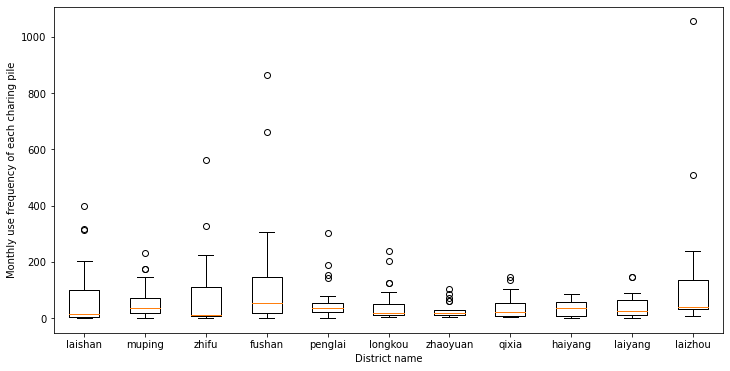

In [16]:
# comparing the use frequency (month_use_frequency_per_pile) of each district
# boxplots, drop the zero charging stations
import matplotlib.pyplot as plt
district_name = ['laishan','muping','zhifu','fushan','penglai','longkou','zhaoyuan','qixia','haiyang','laiyang','laizhou']
plt.figure(figsize=(12,6))
plt.boxplot(data_boxplot, labels=district_name)
plt.xlabel('District name')
plt.ylabel('Monthly use frequency of each charing pile')

In [17]:
data_power_per_char_time = [0]*np.size(data_all_districts)
for i in range(np.size(data_all_districts)):
    data_power_per_char_time[i] = data_all_districts[i].drop(data_all_districts[i][data_all_districts[i]['Unit_per_Cha_time']==0].index).Unit_per_Cha_time

C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


Text(0, 0.5, 'Power consumption of each charing time(kWh)')

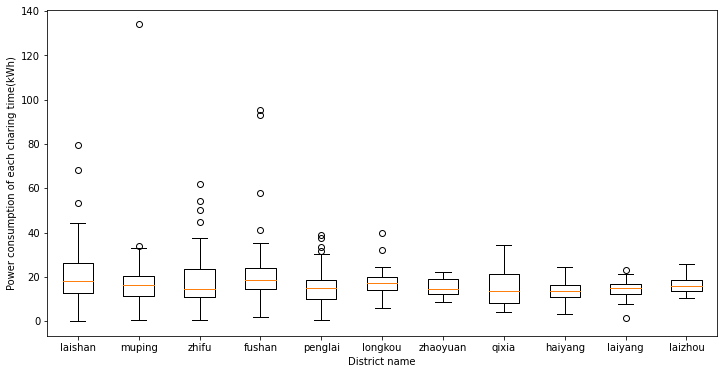

In [18]:
plt.figure(figsize=(12,6))
plt.boxplot(data_power_per_char_time, labels=district_name)
plt.xlabel('District name')
plt.ylabel('Power consumption of each charing time(kWh)')

In [19]:
data_power_per_char_pile = [0]*np.size(data_all_districts)
for i in range(np.size(data_all_districts)):
    data_power_per_char_pile[i] = data_all_districts[i].drop(data_all_districts[i][data_all_districts[i]['Unit_per_Cha_time']==0].index).Unit_per_Cha_pile

C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


Text(0, 0.5, 'Monthly power consumption of each charing pile(kWh)')

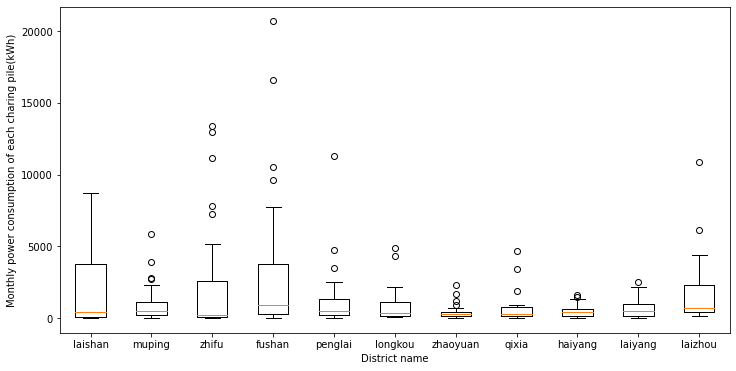

In [20]:
plt.figure(figsize=(12,6))
plt.boxplot(data_power_per_char_pile, labels=district_name)
plt.xlabel('District name')
plt.ylabel('Monthly power consumption of each charing pile(kWh)')

In [21]:
# the number of charging piles of each district
total_num_piles = [0]*np.size(data_all_districts)
for i in range(np.size(data_all_districts)):
    total_num_piles[i] = data_all_districts[i]['Number_charging_piles'].sum()

C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


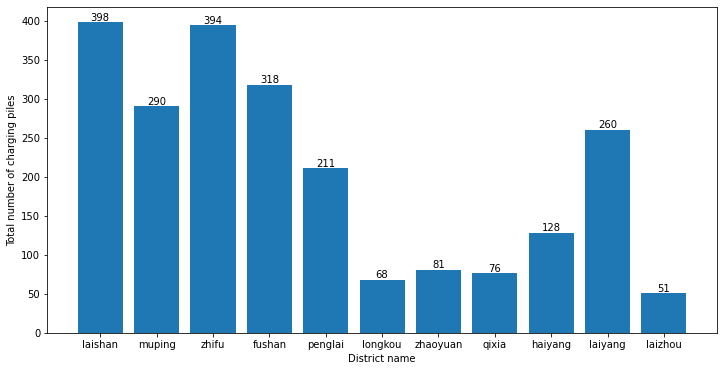

In [22]:
plt.figure(figsize=(12,6))
plt.bar(district_name, total_num_piles, tick_label=district_name)
plt.xlabel('District name')
plt.ylabel('Total number of charging piles')
for a,b in zip(district_name, total_num_piles):
    plt.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )

In [23]:
# the number of charging piles of each district
total_num_stations = [0]*np.size(data_all_districts)
for i in range(np.size(data_all_districts)):
    total_num_stations[i] = data_all_districts[i]['Station_name'].count()

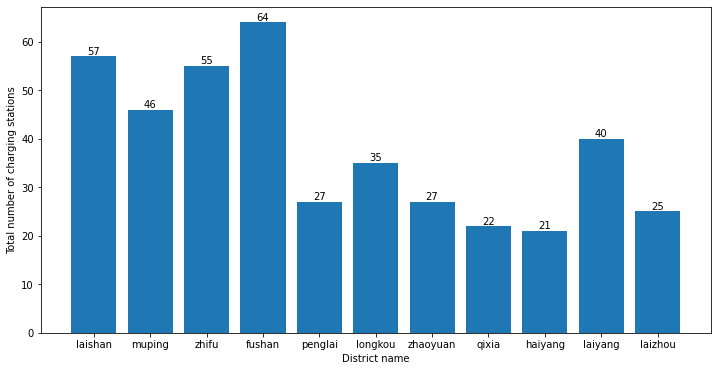

In [24]:
plt.figure(figsize=(12,6))
plt.bar(district_name, total_num_stations, tick_label=district_name)
plt.xlabel('District name')
plt.ylabel('Total number of charging stations')
for a,b in zip(district_name, total_num_stations):
    plt.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )

# analysis laishan district
# the using situation of each charing station

In [25]:
num_stations_laishan = total_num_stations[0]
data_laishan.head()

,Unnamed: 0,Station_name,district,year_month,power_consum（kWh）,times_charging,Number_charging_piles,latitude,longitude,Unit_per_Cha_time,Unit_per_Cha_pile,month_use_frequency_per_pile
0,0,烟台高新区公交场站,莱山区,202109,147737.44,1857,17,37.411116,121.530138,79.56,8690.44,109
2,2,烟台莱山长宁路充电站,莱山区,202109,125802.78,5098,25,37.447031,121.438939,24.68,5032.11,204
13,13,山东省烟台市莱山光华充电站,莱山区,202109,64413.98,3201,8,37.467384,121.443810,20.12,8051.75,400
14,14,烟台朱塂堡公交场站,莱山区,202109,58316.32,2191,7,37.351410,121.350403,26.62,8330.90,313
16,16,烟台上海滩花园公交场站,莱山区,202109,51615.61,968,8,37.440314,121.462538,53.32,6451.95,121


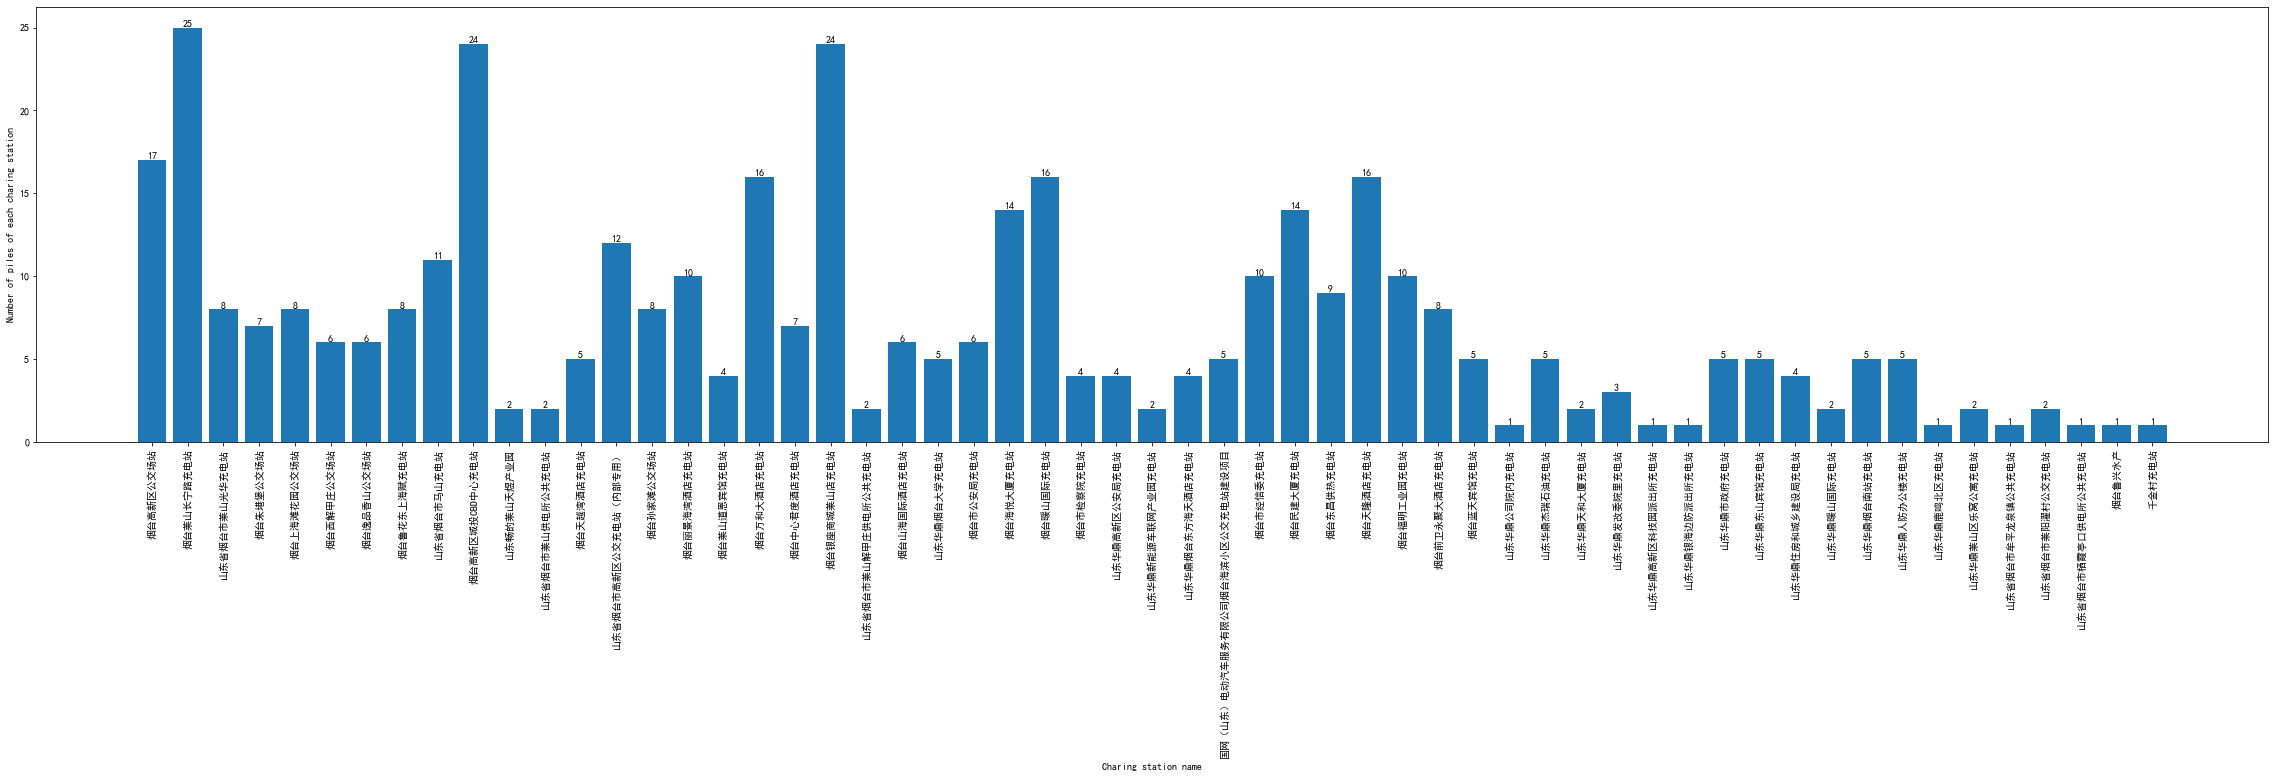

In [57]:
# charging piles number
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
plt.figure(figsize=(40,8))
plt.bar(data_laishan['Station_name'], data_laishan['Number_charging_piles'], tick_label=data_laishan['Station_name'])
plt.xlabel('Charing station name')
plt.ylabel('Number of piles of each charing station')
for a,b in zip(data_laishan['Station_name'], data_laishan['Number_charging_piles']):
    plt.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )
plt.xticks(rotation = 90)
import warnings
warnings.filterwarnings('ignore')

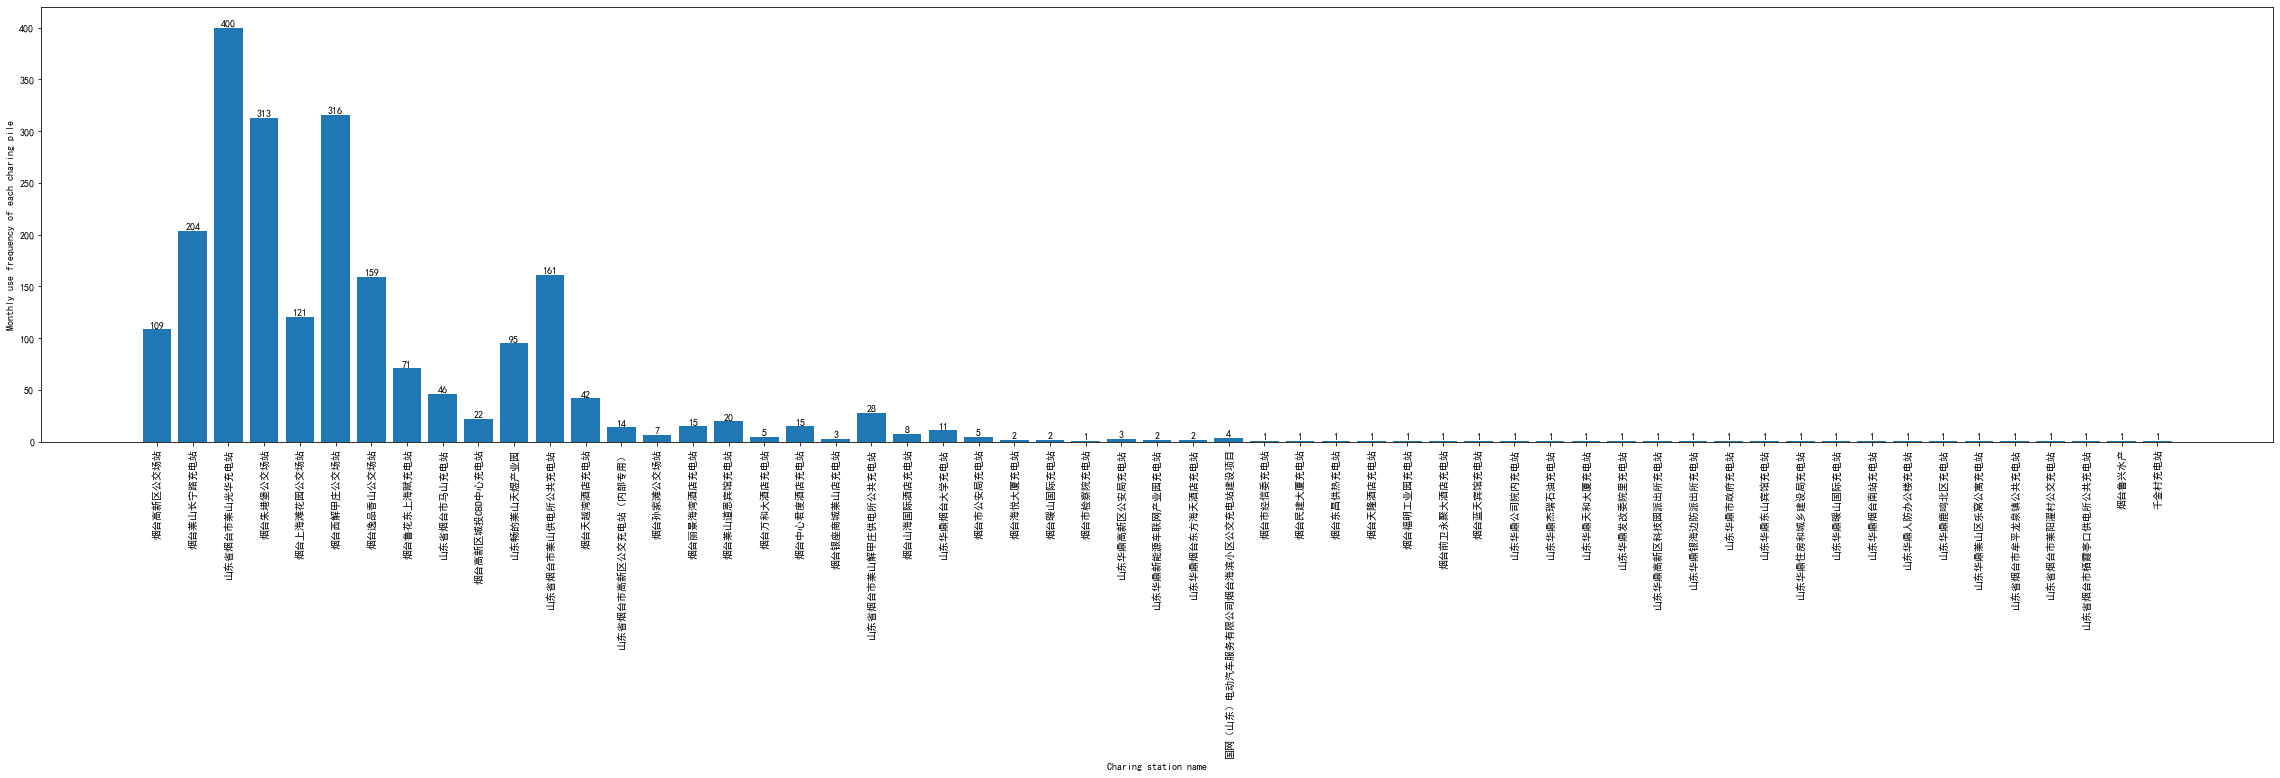

In [27]:
# monthly use frequency of each pile
plt.figure(figsize=(40,8))
plt.bar(data_laishan['Station_name'], data_laishan['month_use_frequency_per_pile'], tick_label=data_laishan['Station_name'])
plt.xlabel('Charing station name')
plt.ylabel('Monthly use frequency of each charing pile')
for a,b in zip(data_laishan['Station_name'], data_laishan['month_use_frequency_per_pile']):
    plt.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )
plt.xticks(rotation = 90)
import warnings
warnings.filterwarnings('ignore')

In [28]:
# heatmap of using frequency
laishan_map = folium.Map(location = [latitude, longitude], zoom_start = 12)
incidents_laishan =plugins.MarkerCluster().add_to(laishan_map)
for lat, lng, name in zip(data_laishan.latitude, data_laishan.longitude, data_laishan.Station_name):
    incidents_laishan.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4,
            popup=name     
        )
    )

# Add incidents to map
circleMarker_laishan = basic_map()
circleMarker_laishan.add_child(incidents_laishan)

In [29]:
# heatmap of number of charing piles
heatMap_laishan = circleMarker_laishan
heatdata = data_laishan[['latitude','longitude','Number_charging_piles']].values.tolist()
HeatMap(heatdata).add_to(heatMap_laishan)
heatMap_laishan

In [30]:
# heatmap of using frequency
heatMap_use_frequncy_laishan = circleMarker_laishan
heatdata = data_laishan[['latitude','longitude','month_use_frequency_per_pile']].values.tolist()
HeatMap(heatdata).add_to(heatMap_use_frequncy_laishan)
heatMap_use_frequncy_laishan

In [31]:
# heatmap of power use of each charging time
heatMap_power_use_times_laishan = circleMarker_laishan
heatdata = data_laishan[['latitude','longitude','Unit_per_Cha_time']].values.tolist()
HeatMap(heatdata).add_to(heatMap_power_use_times_laishan)
heatMap_power_use_times_laishan

In [32]:
# heatmap of monthly power use of each pile
heatMap_power_use_piles_laishan = circleMarker_laishan
heatdata = data_laishan[['latitude','longitude','Unit_per_Cha_pile']].values.tolist()
HeatMap(heatdata).add_to(heatMap_power_use_piles_laishan)
heatMap_power_use_piles_laishan

In [33]:
# distance analysis of each piles
# if the time frequency is high, should deploy high charging speed piles
# the standard types of charging piles in the market
# P-median problems in location selection

# develop P-median model in Laishan district

In [34]:
# step one: figure out the demand point location and demand factor
# Instantiate a feature group for the incidents in the dataframe
incidents_demand_point = folium.map.FeatureGroup()

# Loop through the 200 crimes and add each to the incidents feature group
for lat, lng, name in zip(data_laishan.latitude, data_laishan.longitude, data_laishan.Station_name):
    incidents_demand_point.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4,
            popup=name
            
        )
    )

# Add incidents to map
basic_map().add_child(incidents_demand_point)


In [35]:
data_laishan.head()

,Unnamed: 0,Station_name,district,year_month,power_consum（kWh）,times_charging,Number_charging_piles,latitude,longitude,Unit_per_Cha_time,Unit_per_Cha_pile,month_use_frequency_per_pile
0,0,烟台高新区公交场站,莱山区,202109,147737.44,1857,17,37.411116,121.530138,79.56,8690.44,109
2,2,烟台莱山长宁路充电站,莱山区,202109,125802.78,5098,25,37.447031,121.438939,24.68,5032.11,204
13,13,山东省烟台市莱山光华充电站,莱山区,202109,64413.98,3201,8,37.467384,121.443810,20.12,8051.75,400
14,14,烟台朱塂堡公交场站,莱山区,202109,58316.32,2191,7,37.351410,121.350403,26.62,8330.90,313
16,16,烟台上海滩花园公交场站,莱山区,202109,51615.61,968,8,37.440314,121.462538,53.32,6451.95,121


# plan A, add new charging piles on the existing stations

In [36]:
# show the charging stations that the month_use_frequency_per_pile are bigger than 30
# Instantiate a feature group for the incidents in the dataframe
incidents_demand_point_high_use_frequecy = folium.map.FeatureGroup()
# specify charing pile's month using frequency
month_use_frequency = 10
data_high_use_frequency = data_laishan[data_laishan['month_use_frequency_per_pile']>month_use_frequency]

for lat, lng, name in zip(data_high_use_frequency.latitude, data_high_use_frequency.longitude, data_high_use_frequency.Number_charging_piles):
    incidents_demand_point_high_use_frequecy.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4,
            popup=name
            
        )
    )

# Add incidents to map
basic_map().add_child(incidents_demand_point_high_use_frequecy)

In [37]:
print(f'Total charing piles in Laishan is {data_laishan.Number_charging_piles.sum()}')

Total charing piles in Laishan is 398


In [38]:
data_high_use_frequency.head()

,Unnamed: 0,Station_name,district,year_month,power_consum（kWh）,times_charging,Number_charging_piles,latitude,longitude,Unit_per_Cha_time,Unit_per_Cha_pile,month_use_frequency_per_pile
0,0,烟台高新区公交场站,莱山区,202109,147737.44,1857,17,37.411116,121.530138,79.56,8690.44,109
2,2,烟台莱山长宁路充电站,莱山区,202109,125802.78,5098,25,37.447031,121.438939,24.68,5032.11,204
13,13,山东省烟台市莱山光华充电站,莱山区,202109,64413.98,3201,8,37.467384,121.443810,20.12,8051.75,400
14,14,烟台朱塂堡公交场站,莱山区,202109,58316.32,2191,7,37.351410,121.350403,26.62,8330.90,313
16,16,烟台上海滩花园公交场站,莱山区,202109,51615.61,968,8,37.440314,121.462538,53.32,6451.95,121


In [39]:
# calculate the demand factor
data_high_use_frequency['demand factor'] = (data_high_use_frequency['month_use_frequency_per_pile']/3).astype(int)
# difine the indexes to judge the stations efficiency/overload or not, 5 means charging 5 hours per time, usually, 2 hours can be full charged with public charging pile
# but custermer won't remove the EV cars imediately, so we assume 5 hours per charging time, if time_use_efficiency>1 means that more charging piles should be installed
# otherwise, no more charging piles are needed
duration = 5
data_high_use_frequency['time_use_efficiency'] = (data_high_use_frequency['month_use_frequency_per_pile']/30)*duration/24
# which stations should add new piles, and how many should be added?
station_add_piles = data_high_use_frequency[data_high_use_frequency['time_use_efficiency']>1.0]
station_add_piles['piles_add_number'] = np.ceil(station_add_piles['times_charging']*duration/(30*24)-station_add_piles['Number_charging_piles']).astype(int)


In [40]:
station_add_piles.head(10)

,Unnamed: 0,Station_name,district,year_month,power_consum（kWh）,times_charging,Number_charging_piles,latitude,longitude,Unit_per_Cha_time,Unit_per_Cha_pile,month_use_frequency_per_pile,demand factor,time_use_efficiency,piles_add_number
2,2,烟台莱山长宁路充电站,莱山区,202109,125802.78,5098,25,37.447031,121.438939,24.68,5032.11,204,68,1.416667,11
13,13,山东省烟台市莱山光华充电站,莱山区,202109,64413.98,3201,8,37.467384,121.443810,20.12,8051.75,400,133,2.777778,15
14,14,烟台朱塂堡公交场站,莱山区,202109,58316.32,2191,7,37.351410,121.350403,26.62,8330.90,313,104,2.173611,9
18,18,烟台西解甲庄公交场站,莱山区,202109,49071.64,1898,6,37.388390,121.492616,25.85,8178.61,316,105,2.194444,8
30,30,烟台逸品香山公交场站,莱山区,202109,29516.10,956,6,37.393285,121.429032,30.87,4919.35,159,53,1.104167,1
65,65,山东省烟台市莱山供电所公共充电站,莱山区,202109,6546.01,322,2,37.393078,121.383545,20.33,3273.01,161,53,1.118056,1


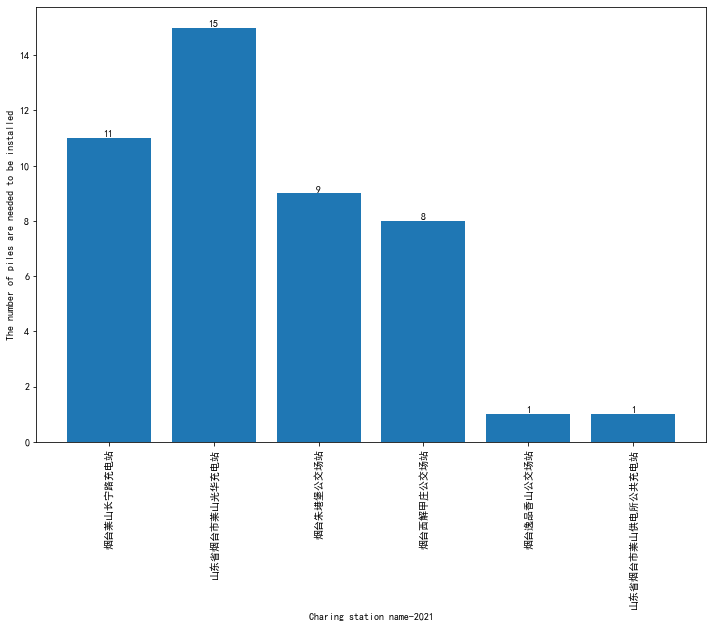

In [41]:
# figure out the added piles in the charging stations
plt.figure(figsize=(12,8))
plt.bar(station_add_piles['Station_name'], station_add_piles['piles_add_number'], tick_label=station_add_piles['Station_name'])
plt.xlabel('Charing station name-2021')
plt.ylabel('The number of piles are needed to be installed')
plt.xticks(rotation = 90)
for a,b in zip(station_add_piles['Station_name'], station_add_piles['piles_add_number']):
    plt.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )

In [42]:
# define indexes service factor Z_distance and E_service
# √ building new piles for specific stations
# E_service = W*d/(TD), W-demand factor, d-distance of demand and station, T-3 days in this model, D-2~3km to the charging station
# √ define a factor/efficiency to check if the piles of stations are enought/overworked
# how close can be considered as the same charging station?
# if the charging station needs to be removed, which one should be removed?
# √ the future development of the EVs,now, 2025,2030
# if new charging stations are required, where should we locate it?

In [43]:
# the future development of the EVs,now, 2025,2030
# according to the development of China，https://www.idc.com/getdoc.jsp?containerId=prCHC47071920,https://www.canalys.com/newsroom/canalys-%E7%BB%8F%E5%8E%86%E9%80%82%E5%BA%A6%E5%A2%9E%E9%95%BF%E7%9A%842020%E5%B9%B4%E5%90%8E
# 2025, it's 3* of 2021

In [44]:
data_laishan['time_use_efficiency'] = (data_laishan['month_use_frequency_per_pile']/30)*duration/24

In [45]:
# EV cars increasing rate from 2021 to 2025
increase_rate_2025 = 3
data_laishan_2025 = data_laishan
data_laishan_2025['month_use_frequency_per_pile'] = data_laishan_2025['month_use_frequency_per_pile']*increase_rate_2025
data_laishan_2025['time_use_efficiency'] = (data_laishan_2025['month_use_frequency_per_pile']/30)*duration/24

In [46]:
station_add_piles_2025 = data_laishan_2025[data_laishan_2025['time_use_efficiency']>1.0]
station_add_piles_2025['piles_add_number'] = np.ceil(station_add_piles_2025['times_charging']*increase_rate_2025*duration/(30*24)-station_add_piles_2025['Number_charging_piles']).astype(int)


In [47]:
station_add_piles_2025.head(57)

,Unnamed: 0,Station_name,district,year_month,power_consum（kWh）,times_charging,Number_charging_piles,latitude,longitude,Unit_per_Cha_time,Unit_per_Cha_pile,month_use_frequency_per_pile,time_use_efficiency,piles_add_number
0,0,烟台高新区公交场站,莱山区,202109,147737.44,1857,17,37.411116,121.530138,79.56,8690.44,327,2.270833,22
2,2,烟台莱山长宁路充电站,莱山区,202109,125802.78,5098,25,37.447031,121.438939,24.68,5032.11,612,4.250000,82
13,13,山东省烟台市莱山光华充电站,莱山区,202109,64413.98,3201,8,37.467384,121.443810,20.12,8051.75,1200,8.333333,59
14,14,烟台朱塂堡公交场站,莱山区,202109,58316.32,2191,7,37.351410,121.350403,26.62,8330.90,939,6.520833,39
16,16,烟台上海滩花园公交场站,莱山区,202109,51615.61,968,8,37.440314,121.462538,53.32,6451.95,363,2.520833,13
18,18,烟台西解甲庄公交场站,莱山区,202109,49071.64,1898,6,37.388390,121.492616,25.85,8178.61,948,6.583333,34
30,30,烟台逸品香山公交场站,莱山区,202109,29516.10,956,6,37.393285,121.429032,30.87,4919.35,477,3.312500,14
53,53,烟台鲁花东上海赋充电站,莱山区,202109,9792.35,564,8,37.522659,121.442859,17.36,1224.04,213,1.479167,4
61,61,山东畅的莱山天煜产业园,莱山区,202109,8409.60,189,2,37.411027,121.416223,44.50,4204.80,285,1.979167,2
65,65,山东省烟台市莱山供电所公共充电站,莱山区,202109,6546.01,322,2,37.393078,121.383545,20.33,3273.01,483,3.354167,5


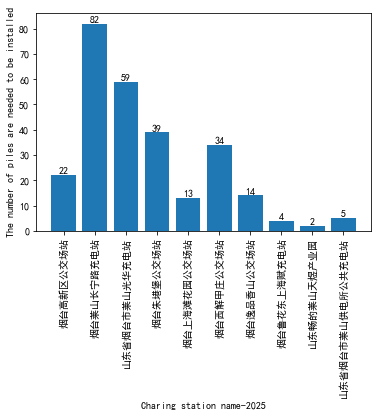

In [48]:
# figure out the added piles in the charging stations of 2025
plt.bar(station_add_piles_2025['Station_name'], station_add_piles_2025['piles_add_number'], tick_label=station_add_piles_2025['Station_name'])
plt.xlabel('Charing station name-2025')
plt.ylabel('The number of piles are needed to be installed')
plt.xticks(rotation = 90)
for a,b in zip(station_add_piles_2025['Station_name'], station_add_piles_2025['piles_add_number']):
    plt.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )

In [49]:
# EV cars increasing rate from 2021 to 2025, 6*
increase_rate_2030 = 6
data_laishan_2030 = data_laishan
data_laishan_2030['month_use_frequency_per_pile'] = data_laishan_2025['month_use_frequency_per_pile']*increase_rate_2030
data_laishan_2030['time_use_efficiency'] = (data_laishan_2030['month_use_frequency_per_pile']/30)*duration/24

In [50]:
station_add_piles_2030 = data_laishan_2030[data_laishan_2030['time_use_efficiency']>1.0]
station_add_piles_2030['piles_add_number'] = np.ceil(station_add_piles_2030['times_charging']*increase_rate_2030*duration/(30*24)-station_add_piles_2030['Number_charging_piles']).astype(int)

In [51]:
station_add_piles_2030.head(10)

,Unnamed: 0,Station_name,district,year_month,power_consum（kWh）,times_charging,Number_charging_piles,latitude,longitude,Unit_per_Cha_time,Unit_per_Cha_pile,month_use_frequency_per_pile,time_use_efficiency,piles_add_number
0,0,烟台高新区公交场站,莱山区,202109,147737.44,1857,17,37.411116,121.530138,79.56,8690.44,1962,13.625,61
2,2,烟台莱山长宁路充电站,莱山区,202109,125802.78,5098,25,37.447031,121.438939,24.68,5032.11,3672,25.500,188
13,13,山东省烟台市莱山光华充电站,莱山区,202109,64413.98,3201,8,37.467384,121.443810,20.12,8051.75,7200,50.000,126
14,14,烟台朱塂堡公交场站,莱山区,202109,58316.32,2191,7,37.351410,121.350403,26.62,8330.90,5634,39.125,85
16,16,烟台上海滩花园公交场站,莱山区,202109,51615.61,968,8,37.440314,121.462538,53.32,6451.95,2178,15.125,33
18,18,烟台西解甲庄公交场站,莱山区,202109,49071.64,1898,6,37.388390,121.492616,25.85,8178.61,5688,39.500,74
30,30,烟台逸品香山公交场站,莱山区,202109,29516.10,956,6,37.393285,121.429032,30.87,4919.35,2862,19.875,34
53,53,烟台鲁花东上海赋充电站,莱山区,202109,9792.35,564,8,37.522659,121.442859,17.36,1224.04,1278,8.875,16
57,57,山东省烟台市马山充电站,莱山区,202109,9203.06,502,11,37.417534,121.517010,18.33,836.64,828,5.750,10
60,60,烟台高新区城投CBD中心充电站,莱山区,202109,8828.70,518,24,37.449213,121.482192,17.04,367.86,396,2.750,-2


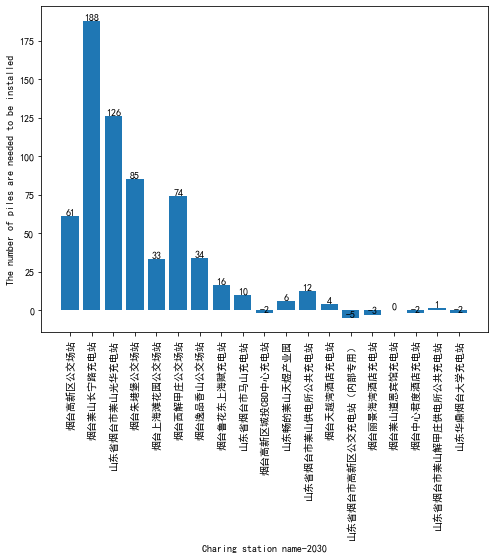

In [52]:
# figure out the added piles in the charging stations of 2025, https://finance.sina.com.cn/chanjing/cyxw/2019-05-19/doc-ihvhiews2890186.shtml
plt.figure(figsize=(8,6))
plt.bar(station_add_piles_2030['Station_name'], station_add_piles_2030['piles_add_number'], tick_label=station_add_piles_2030['Station_name'])
plt.xlabel('Charing station name-2030')
plt.ylabel('The number of piles are needed to be installed')
plt.xticks(rotation = 90)
for a,b in zip(station_add_piles_2030['Station_name'], station_add_piles_2030['piles_add_number']):
    plt.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )

# plan B, build new charging stations somewhere

In [53]:
# building new stations should be more better in the future, select the candidate position first
# for now, i.e., year of 2021
# for the year of 2025
# for the year of 2030

In [54]:
# for now, i.e., year of 2021
# the traffic information should be provided to analyze the new charging stations, and P-median methond can be used to find out the optimal charging place/station

In [55]:
# calculate the matrix distance of each charging station（unit:km）
# from geopy.distance import geodesic
# print(geodesic((34, -81), (32, -87)).km) 
import math

def get_distances(locs_1, locs_2):
    n_rows_1 = locs_1.shape[0]
    n_rows_2 = locs_2.shape[0]
    dists = np.empty((n_rows_1, n_rows_2))
    # The loops here are inefficient
    for i in range(n_rows_1):
        for j in range(n_rows_2):
            dists[i, j] = get_distance_from_lat_long(locs_1[i], locs_2[j])
    return dists*1.609344


def get_distance_from_lat_long(loc_1, loc_2):

    earth_radius = 3958.75

    lat_dif = math.radians(loc_1[0] - loc_2[0])
    long_dif = math.radians(loc_1[1] - loc_2[1])
    sin_d_lat = math.sin(lat_dif / 2)
    sin_d_long = math.sin(long_dif / 2)
    step_1 = (sin_d_lat ** 2) + (sin_d_long ** 2) * math.cos(math.radians(loc_1[0])) * math.cos(math.radians(loc_2[0])) 
    step_2 = 2 * math.atan2(math.sqrt(step_1), math.sqrt(1-step_1))
    dist = step_2 * earth_radius
    return dist

locations = np.array(data_high_use_frequency[['latitude','longitude']])
distance_matrix = get_distances(locations, locations)
print(f'the maximum distance is {distance_matrix.max()} km')
print(f'the average distance is {distance_matrix.mean()} km')

the maximum distance is 20.717927505163097 km
the average distance is 7.842522650069849 km
